In [1]:
# 데이터분석
import pandas as pd
import numpy as np 

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc 

import os
import warnings
import random

# ML/DL 모델 및 sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 경고 끄기
warnings.filterwarnings(action='ignore')

from functools import reduce

# 데이터프레임 제한 풀기
# pd.set_option('display.max_row', 100)
# pd.set_option('display.max_columns', 150)
# pd.set_option('display.max_seq_items', None)

In [2]:
samil_df = pd.read_csv('data/Samil_feature_concat.csv').drop(columns=['Unnamed: 0'])

In [ ]:
'''
# 전처리

# 날짜 형식 '-'로 맞추기

# def replace_month(data):
#     data.month = data.month.astype(str).str.replace('.','-')

# 날짜 이상하게 표시된 것 제거
df1.month.iloc[-3:] = df1.month.iloc[-3:].str.replace(' p\)','')

# 다 합해주기
from functools import reduce

dfs = [df, df1, df2, df3, df4, df5, df6, df7, df8] # df, df1, df4, df5, df6, df7, df8
df_merge = reduce(lambda left, right : pd.merge(left, right, on='month',how='outer'), dfs).sort_values('month')

# df_merge.reset_index().drop(columns=['index']).to_csv('feature.csv')

# df_merge = df_merge.drop(df_merge.index[-1])

# replace_month(df1)
# replace_month(df2)
# replace_month(df3)
# replace_month(df4)
# replace_month(df5)
# replace_month(df6)
# replace_month(df7)
# replace_month(df8)
'''

In [3]:
samil_df

,month,Samil_Close,Samil_Change,Kospi_Close,Kospi_Change,label,선행종합지수(2015=100),재고순환지표(%p),경제심리지수,기계류내수출하지수(선박제외)(2015=100),...,기타가구 (2015=100)_y,기타제조업제품 (2015=100)_y,기타제조업제품 (2015=100),총지수,식료품 및 에너지제외 지수,식료품 및 에너지,보통휘발유,실내등유,보일러등유,자동차용 경유
0,2000-01,0.166849,0.466341,0.166989,-0.003865,0.0,58.5,-,-,-,...,60.23,78.87,78.23,62.456,64.697,-,NaN,NaN,NaN,NaN
1,2000-02,0.151669,0.509320,0.150465,-0.006220,0.0,58.7,-,-,-,...,60.23,78.78,78.23,62.647,64.828,-,NaN,NaN,NaN,NaN
2,2000-03,0.283741,0.872881,0.141921,0.002064,0.0,59.0,-,-,-,...,60.23,78.84,78.23,62.962,65.286,-,NaN,NaN,NaN,NaN
3,2000-04,0.305151,0.329995,0.107834,-0.008667,1.0,58.8,-,-,-,...,60.23,78.87,78.23,62.709,65.352,-,NaN,NaN,NaN,NaN
4,2000-05,0.242085,0.337147,0.086009,0.000940,1.0,58.8,-,-,-,...,60.23,78.81,78.23,62.393,65.156,-,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,2022-06,0.141677,0.283132,0.704787,-0.006930,0.0,129.2,-14.2,105.0,99.7,...,116.86,109.24,109.24,108.220,105.040,119.26,2084.00,1601.77,-,2089.03
292,2022-07,0.122400,0.520008,0.665200,0.002419,1.0,129.4,-15.4,102.3,103.0,...,116.86,121.19,121.19,108.740,105.430,120.23,2029.99,1686.55,-,2084.91
293,2022-08,0.139956,0.425427,0.707168,0.000423,0.0,129.5,-16.1,99.9,105.8,...,116.86,121.19,121.19,108.620,105.760,118.54,1792.19,1639.49,-,1889.31
294,2022-09,0.113694,0.317581,0.656375,-0.006745,0.0,NaN,NaN,NaN,NaN,...,116.86,121.19,121.19,108.930,105.710,120.12,1730.00,1620.15,-,1850.20


### 전처리

In [4]:
samil_df.columns

Index(['month', 'Samil_Close', 'Samil_Change', 'Kospi_Close', 'Kospi_Change',
       'label', ' 선행종합지수(2015=100)', '　　　 재고순환지표(%p)', '　　　 경제심리지수',
       '　　　 기계류내수출하지수(선박제외)(2015=100)',
       ...
       '　　　　　　　　　　　　　　　기타가구 (2015=100)_y', '　　　　　　　　　　　　기타제조업제품 (2015=100)_y',
       '　　　　　　　　　　　　　　　기타제조업제품 (2015=100)', '총지수', '식료품 및 에너지제외 지수',
       '식료품 및 에너지', '보통휘발유', '실내등유', '보일러등유', '자동차용 경유'],
      dtype='object', length=610)

In [5]:
# 컬럼 공백 제거
samil_df.columns = samil_df.columns.str.strip()

In [6]:
# '-' 값 Nan 값으로 변경
samil_df = samil_df.replace('-', np.nan)

In [ ]:
samil_df.info(verbose=True, null_counts=True)

In [7]:
# 앞에 값으로 결측치 처리
samil_df = samil_df.fillna(method='ffill')
samil_df = samil_df.fillna(method='bfill')


In [ ]:
samil_df

In [ ]:
samil_df.isnull().sum()

## new_data 추가하기

In [8]:
# 금리, DJ 지수, NASDAQ 지수, S&P500 지수 추가

rate = pd.read_csv('data/금리.csv')
dj = pd.read_csv('data/DJI_1m.csv').drop(columns=['Unnamed: 0'])
nas = pd.read_csv('data/NASDAQ_1m.csv').drop(columns=['Unnamed: 0'])
sp = pd.read_csv('data/SP500_1m.csv').drop(columns=['Unnamed: 0'])

world_oil = pd.read_csv('data/국제유가08_22.csv').rename(columns={'date':'month'})#.drop(columns=['Unnamed: 0'])
usa_rate = pd.read_csv('data/미국금리.csv').rename(columns={'date':'month'})

In [ ]:
usa_rate

In [9]:
# month 기준으로 merge
dfs = [samil_df, rate, dj, nas, sp, world_oil, usa_rate] # df, df1, df4, df5, df6, df7, df8
df_merge = reduce(lambda left, right : pd.merge(left, right, on='month',how='outer'), dfs)#.sort_values('month')

In [10]:
df = df_merge.rename(columns={'Close_x':'DJI_Close','Close_y':'NASDAQ_Close','Close':'S&P500_Close'})

In [ ]:
# df=df_merge

In [ ]:
df

In [11]:
# new data의 '-', Nan 값 처리

df = df.replace('-', np.nan)
df = df.fillna(method='ffill')
df = df.fillna(method='bfill')

In [ ]:
df

In [12]:
# 월 평균값을 내셨다면 안해도 되는 코드들입니다.
# 데이터프레임에 월별주가평균, 코스피월별평균만 있으면 됩니다.
# 월 평균 값만 남기고 나머지 빈칸 있는 행 삭제
# df = pd.read_csv('data/9_emart주가_월평균.csv')
# df = df.dropna()
# df.date = pd.to_datetime(df.date)
# df['date'] = df['date'].dt.strftime('%Y-%m')
# df = df.set_index('date')
# df = df.reset_index('date')
'''
# 월 평균값 있을때
df = pd.read_csv('data/10_emart - 주가,코스피원본.csv')
df.date = pd.to_datetime(df.date)
df['date'] = df['date'].dt.strftime('%Y-%m')
df = df.set_index('date')
'''

# MinMaxScaler 데이터 정규화
scaler = MinMaxScaler()
df = df.set_index('month')
scaler.fit(df)
scaled = scaler.transform(df)
df_scaled = pd.DataFrame(scaled, columns=df.columns)

df = df.reset_index()
df_scaled.insert(0,'month', df['month'] )

df_scaled
# df = df.merge(df_scaled,how='left')
# df.head()

,month,Samil_Close,Samil_Change,Kospi_Close,Kospi_Change,label,선행종합지수(2015=100),재고순환지표(%p),경제심리지수,기계류내수출하지수(선박제외)(2015=100),...,NASDAQ_Close,S&P500_Close,휘발유(95RON),휘발유(92RON),등유,경유(0.001%),경유(0.05%),고유황중유(180cst/3.5%),나프타,미국 금리
0,2000-01,0.166849,0.466341,0.159749,0.307588,0.0,0.031378,0.437050,0.712329,0.245478,...,0.190186,0.170628,0.592961,0.619397,0.581074,0.000000,0.562740,0.545780,0.701217,0.84
1,2000-02,0.151669,0.509320,0.142720,0.199083,0.0,0.034106,0.437050,0.712329,0.245478,...,0.217454,0.161257,0.592961,0.619397,0.581074,0.000000,0.562740,0.545780,0.701217,0.88
2,2000-03,0.283741,0.872881,0.133917,0.580746,0.0,0.038199,0.437050,0.712329,0.245478,...,0.244361,0.174872,0.592961,0.619397,0.581074,0.000000,0.562740,0.545780,0.701217,0.92
3,2000-04,0.305151,0.329995,0.098791,0.086354,1.0,0.035471,0.437050,0.712329,0.245478,...,0.179903,0.179758,0.592961,0.619397,0.581074,0.000000,0.562740,0.545780,0.701217,0.92
4,2000-05,0.242085,0.337147,0.076302,0.528975,1.0,0.035471,0.437050,0.712329,0.245478,...,0.156900,0.168814,0.592961,0.619397,0.581074,0.000000,0.562740,0.545780,0.701217,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,2022-06,0.141677,0.283132,0.713928,0.166370,0.0,0.995907,0.188849,0.782779,0.529716,...,0.698346,0.801966,1.000000,1.000000,0.979595,1.000000,0.992122,0.825875,0.618130,0.24
295,2022-07,0.122400,0.520008,0.673135,0.597121,1.0,0.998636,0.167266,0.729941,0.614987,...,0.712324,0.805229,0.751411,0.750386,0.778143,0.821919,0.769127,0.613176,0.593047,0.36
296,2022-08,0.139956,0.425427,0.716381,0.505142,0.0,1.000000,0.154676,0.682975,0.687339,...,0.777351,0.868235,0.671072,0.678053,0.759655,0.790024,0.749042,0.600173,0.504242,0.36
297,2022-09,0.113694,0.317581,0.664041,0.174894,0.0,1.000000,0.154676,0.682975,0.687339,...,0.697243,0.789605,0.671072,0.678053,0.759655,0.790024,0.749042,0.600173,0.504242,0.36


In [ ]:
a = 50
df_ = df[:a]

In [ ]:
data = df_

# 주가 데이터 그래프
plt.figure(figsize=(15, 6))
plt.rcParams['font.family'] = 'AppleGothic'
ax = sns.lineplot(data=data, x="month", y='Samil_Close', label='samil_price', color='brown')
ax = sns.lineplot(data=data, x="month", y='Kospi_Close', label='kospi_price', color='blue')
ax = sns.barplot(data=data, x="month", y="label", label='↓', color = 'yellow', alpha  = 0.3)

total_len = len(data.index)
ax.set_xticks(np.arange(0, total_len + 1, 20))

plt.show()

In [ ]:
# 주가 데이터 그래프

data = df_scaled

plt.figure(figsize=(20, 10))
plt.rcParams['font.family'] = 'AppleGothic'

# plt.subplot(2, 1, 1)
# plt.axhline(y=0, color='black', linewidth=1)
ax = sns.lineplot(data=data, x="month", y='Samil_Close', label='samil_price', color='brown')
ax = sns.lineplot(data=data, x="month", y='Kospi_Close', label='kospi_price', color='blue')
ax = sns.barplot(data=data, x="month", y="label", label='↓', color = 'yellow', alpha  = 0.3)

'''
plt.subplot(2, 1, 1)
plt.figure(figsize=(20, 10))
plt.axhline(y=0, color='r', linewidth=1)
sns.lineplot(data=data3, x="Date", y='Kospi_Change', label='kospi_change', color='orange')
sns.lineplot(data=data3, x='Date', y='CJ_Change', label='cj_change', color='skyBlue')
'''

total_len = len(data.index)
ax.set_xticks(np.arange(0, total_len + 1, 15))

plt.show()


'''
# 주가 데이터 그래프
plt.figure(figsize=(15, 6))
plt.rcParams['font.family'] = 'AppleGothic'

sns.lineplot(data=df, x="date", y="k_s - p_s", label='하락정도')
sns.scatterplot(data=df, x="date", y="downturn", label='주가하락세')
sns.lineplot(data=df, x="date", y="pricemm", label='price_minmax')
sns.lineplot(data=df, x="date", y="kospimm", label='kospi_minmax')

plt.ylabel('')
plt.xticks(rotation=45)

plt.show()
'''

In [ ]:
df.to_csv('yvalue.csv',index=False)

- 저장해서 액셀로 켜시고 https://docs.google.com/spreadsheets/d/1fgvvsrypJKAZEljnHw-BNQsWu9WNRNBAtiMUwEad9Sc/edit#gid=1221057598 이 파일을 복사해서 각 시트에 y값('downturn'열)을 만든 데이터로 대체하시면 됩니다.
- downturn이 target(y값) feature입니다. 이것만 date 열 오른쪽에 남기고, 그 오른쪽에 필요한 feature를 추가하면 됩니다.
- 카테고리별로 시트를 나눠놨으니 그 시트에 바로 복붙하세요

### feature importance로 feature selection

In [ ]:
# df = df_scaled.set_index('month')

In [11]:
df

,month,Samil_Close,Samil_Change,Kospi_Close,Kospi_Change,label,선행종합지수(2015=100),재고순환지표(%p),경제심리지수,기계류내수출하지수(선박제외)(2015=100),...,NASDAQ_Close,S&P500_Close,휘발유(95RON),휘발유(92RON),등유,경유(0.001%),경유(0.05%),고유황중유(180cst/3.5%),나프타,미국 금리
0,2000-01,0.166849,0.466341,0.166989,-0.003865,0.0,58.5,-0.4,101.4,88.7,...,4013.493994,1425.585504,100.38,99.60,106.12,0.00,108.04,73.20,93.35,0.0550
1,2000-02,0.151669,0.509320,0.150465,-0.006220,0.0,58.7,-0.4,101.4,88.7,...,4410.871021,1388.874500,100.38,99.60,106.12,0.00,108.04,73.20,93.35,0.0575
2,2000-03,0.283741,0.872881,0.141921,0.002064,0.0,59.0,-0.4,101.4,88.7,...,4802.988260,1442.212599,100.38,99.60,106.12,0.00,108.04,73.20,93.35,0.0600
3,2000-04,0.305151,0.329995,0.107834,-0.008667,1.0,58.8,-0.4,101.4,88.7,...,3863.637400,1461.355257,100.38,99.60,106.12,0.00,108.04,73.20,93.35,0.0600
4,2000-05,0.242085,0.337147,0.086009,0.000940,1.0,58.8,-0.4,101.4,88.7,...,3528.416826,1418.479548,100.38,99.60,106.12,0.00,108.04,73.20,93.35,0.0650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,2022-06,0.141677,0.283132,0.704787,-0.006930,0.0,129.2,-14.2,105.0,99.7,...,11418.919085,3898.946684,155.20,148.85,164.32,176.83,168.54,99.05,84.34,0.0175
295,2022-07,0.122400,0.520008,0.665200,0.002419,1.0,129.4,-15.4,102.3,103.0,...,11622.631543,3911.729492,121.72,116.55,134.90,145.34,137.12,79.42,81.62,0.0250
296,2022-08,0.139956,0.425427,0.707168,0.000423,0.0,129.5,-16.1,99.9,105.8,...,12570.260403,4158.563084,110.90,107.19,132.20,139.70,134.29,78.22,71.99,0.0250
297,2022-09,0.113694,0.317581,0.656375,-0.006745,0.0,129.5,-16.1,99.9,105.8,...,11402.849981,3850.520496,110.90,107.19,132.20,139.70,134.29,78.22,71.99,0.0250


In [ ]:
# df.reset_index(inplace=True)

In [ ]:
df.iloc[:,6:]

In [ ]:
df.info(verbose=True, null_counts=True)
# df.value_counts()

In [ ]:
df.columns.value_counts()

In [13]:
# 겹치는 컬럼.. 그냥 제거하기

drop = []
for i in range(len(df)):
    if (df.columns.value_counts()[i] > 1):
        drop.append(df.columns.value_counts().index[i])

In [ ]:
drop

In [14]:
df = df.drop(columns=drop, axis=1)

In [ ]:
df

In [15]:
# MinMaxScaler 데이터 정규화
scaler = MinMaxScaler()
df = df.set_index('month')
scaler.fit(df)
scaled = scaler.transform(df)
df_scaled = pd.DataFrame(scaled, columns=df.columns)

df = df.reset_index()
df_scaled.insert(0,'month', df['month'] )

df_scaled
# df = df.merge(df_scaled,how='left')
# df.head()

,month,Samil_Close,Samil_Change,Kospi_Close,Kospi_Change,label,선행종합지수(2015=100),재고순환지표(%p),경제심리지수,기계류내수출하지수(선박제외)(2015=100),...,NASDAQ_Close,S&P500_Close,휘발유(95RON),휘발유(92RON),등유,경유(0.001%),경유(0.05%),고유황중유(180cst/3.5%),나프타,미국 금리
0,2000-01,0.166849,0.466341,0.159749,0.307588,0.0,0.031378,0.437050,0.712329,0.245478,...,0.190186,0.170628,0.592961,0.619397,0.581074,0.000000,0.562740,0.545780,0.701217,0.84
1,2000-02,0.151669,0.509320,0.142720,0.199083,0.0,0.034106,0.437050,0.712329,0.245478,...,0.217454,0.161257,0.592961,0.619397,0.581074,0.000000,0.562740,0.545780,0.701217,0.88
2,2000-03,0.283741,0.872881,0.133917,0.580746,0.0,0.038199,0.437050,0.712329,0.245478,...,0.244361,0.174872,0.592961,0.619397,0.581074,0.000000,0.562740,0.545780,0.701217,0.92
3,2000-04,0.305151,0.329995,0.098791,0.086354,1.0,0.035471,0.437050,0.712329,0.245478,...,0.179903,0.179758,0.592961,0.619397,0.581074,0.000000,0.562740,0.545780,0.701217,0.92
4,2000-05,0.242085,0.337147,0.076302,0.528975,1.0,0.035471,0.437050,0.712329,0.245478,...,0.156900,0.168814,0.592961,0.619397,0.581074,0.000000,0.562740,0.545780,0.701217,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,2022-06,0.141677,0.283132,0.713928,0.166370,0.0,0.995907,0.188849,0.782779,0.529716,...,0.698346,0.801966,1.000000,1.000000,0.979595,1.000000,0.992122,0.825875,0.618130,0.24
295,2022-07,0.122400,0.520008,0.673135,0.597121,1.0,0.998636,0.167266,0.729941,0.614987,...,0.712324,0.805229,0.751411,0.750386,0.778143,0.821919,0.769127,0.613176,0.593047,0.36
296,2022-08,0.139956,0.425427,0.716381,0.505142,0.0,1.000000,0.154676,0.682975,0.687339,...,0.777351,0.868235,0.671072,0.678053,0.759655,0.790024,0.749042,0.600173,0.504242,0.36
297,2022-09,0.113694,0.317581,0.664041,0.174894,0.0,1.000000,0.154676,0.682975,0.687339,...,0.697243,0.789605,0.671072,0.678053,0.759655,0.790024,0.749042,0.600173,0.504242,0.36


In [16]:
df = df_scaled

## xgboost Classifier

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,6:], df['label'], test_size=0.2, random_state=42)

### GridSearch

In [ ]:
from xgboost import XGBClassifier
import xgboost
from sklearn import model_selection

# train, test split (8:2)
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,6:], df['label'], test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print(X_train.shape)
print(X_test.shape)

# 0,1이 고르게 나누어졌을까?
print(y_train.value_counts()/train_cnt)
print(y_test.value_counts()/test_cnt)

# grid search 로 하이퍼파라미터 탐색
xg_parameters ={'max_depth' : [3,4], 
                'tree_method' : ['hist'],
                'n_estimators': [32, 200, 300, 400], 
                'learning_rate':[0.3,0.4,0.5], 
                'random_state': [99],
                'gamma': [0.7, 1, 3],
                'min_child_weight' : [1,3,5],
                'max_leaves' : [10,15,20],
                'subsample' : [0.7],
                'colsample_bytree' : [1.0, 1.2, 1.4],
                'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
                'eta' : [0.3,0.5,0.7]
                }

model = XGBClassifier()

grid_search_xg = model_selection.GridSearchCV ( estimator = model, param_grid = xg_parameters, scoring = 'accuracy' )
grid_search_xg.fit( X_train, y_train )
best_xg = grid_search_xg.best_params_
best_xg
print('xgboost best estimator : ',grid_search_xg.best_estimator_)
print('xgboost best param : ',grid_search_xg.best_params_)
print('xgboost best accuracy : ',grid_search_xg.best_score_)

# best parameter로 학습된 모델로 테스트 데이터 예측 및 평가
xgb_pred = grid_search_xg.best_estimator_.predict(X_test)
print('xgboost accuracy(test set) : {:.3f}'.format(accuracy_score(y_test, xgb_pred)))

0.6833333333333333


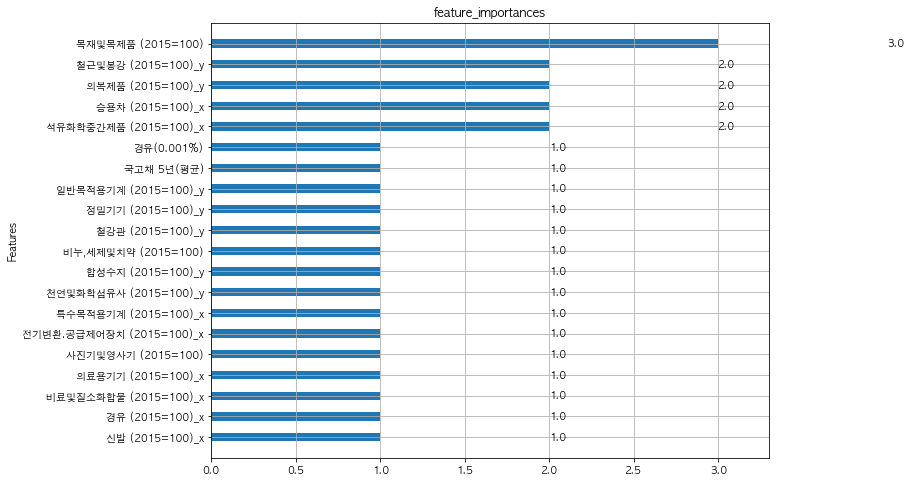

In [19]:
from xgboost import XGBClassifier
import xgboost

model = XGBClassifier(gamma=6, learning_rate=0.3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(accuracy_score(y_pred, y_test))

fig, ax = plt.subplots(1,1,figsize=(10,8))
plt.rcParams['font.family'] = 'AppleGothic'
xgboost.plot_importance(model, title='feature_importances', xlabel='', ax=ax, max_num_features=20, height=0.4)
# xgboost.plot_importance(xgb, title='feature_importances', xlabel='', grid=False, ax=ax)

plt.show()

(239, 483)
(60, 483)
1.0    0.594142
0.0    0.405858
Name: label, dtype: float64
1.0    0.566667
0.0    0.433333
Name: label, dtype: float64
정확도 :  0.5833333333333334
목재 (2015=100)            0.113828
사진기및영사기 (2015=100)       0.053742
석유화학중간제품 (2015=100)_x    0.042628
최종재내구재(수입) (2015=100)    0.042548
건설수주액(실질)(십억원)           0.035489
정밀기기 (2015=100)_x        0.034975
표면처리강재 (2015=100)_y      0.033889
열간압연강재 (2015=100)_x      0.033739
합성고무 (2015=100)_x        0.031885
화장품 (2015=100)_x         0.031314
dtype: float64


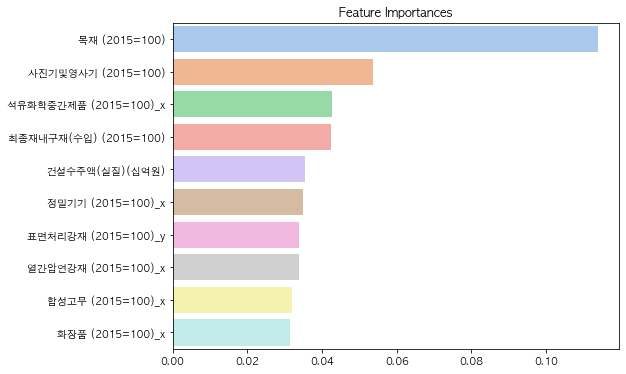

In [35]:
'''
# 데이터 불러오기 및 날짜 인덱스 지정
df = pd.read_csv('data/10_emart - 동행&후행.csv') # 파일 경로를 수정해주세요
df.date = pd.to_datetime(df.date)
df = df.set_index('date')
df = df.drop(['k_s - p_s'], axis=1)
'''

from sklearn.tree import DecisionTreeClassifier

# train, test split (8:2)
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,6:], df['label'], test_size=0.2, random_state=42)
train_cnt = y_train.count()
test_cnt = y_test.count()
print(X_train.shape)
print(X_test.shape)

# 0,1이 고르게 나누어졌을까?
print(y_train.value_counts()/train_cnt)
print(y_test.value_counts()/test_cnt)

# CART 모델 학습
model = DecisionTreeClassifier(max_depth=6, random_state=1))
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)
print('정확도 : ', accuracy_score(y_pred, y_test))

# feature importance 확인
ftr_importances = pd.Series(model.feature_importances_, index = X_train.columns)

ftr_top5 = ftr_importances.sort_values(ascending=False)[:10]

plt.figure(figsize=(8,6))
plt.rcParams['font.family'] = 'AppleGothic'
plt.title('Feature Importances') # 그래프 제목을 변경해주세요
sns.barplot(x=ftr_top5, y=ftr_top5.index, palette='pastel')
print(ftr_top5)
plt.show()

- 이런 식으로 상위에 뜬 feature만 selection해서 새로운 데이터 프레임을 만듭니다(액셀 작업 추천)
- accuracy가 0.7 이 넘는 데이터에서 나온 feature를 넣는게 좋았던 것 같습니다.

In [115]:
# 뽑힌 피쳐들 다시 돌려보기 

# ftr_top5.index.tolist()
df_top = df[ftr_top5.index.tolist()].set_index(df['month'])
df_top10 = pd.merge(df.set_index('month').iloc[:,:6], df_top, on='month')
df_top10

,Samil_Close,Samil_Change,Kospi_Close,Kospi_Change,label,선행종합지수(2015=100),목재및목제품 (2015=100),석유화학중간제품 (2015=100)_x,사진기및영사기 (2015=100),건설수주액(실질)(십억원),표면처리강재 (2015=100)_y,경유(0.001%),"알루미늄제련,정련및합금제품 (2015=100)","베어링,기어및동력전달장치 (2015=100)_y",LCD평판디스플레이 (2015=100)_x,과실및채소가공품 (2015=100)
month,,,,,,,,,,,,,,,,
2000-01,0.166849,0.466341,0.159749,0.307588,0.0,0.031378,0.198350,0.180820,1.000000,0.222511,0.133030,0.000000,0.183184,0.072604,0.996545,0.154179
2000-02,0.151669,0.509320,0.142720,0.199083,0.0,0.034106,0.184235,0.201678,0.959002,0.222511,0.125387,0.000000,0.178524,0.052132,0.957971,0.154179
2000-03,0.283741,0.872881,0.133917,0.580746,0.0,0.038199,0.184235,0.236415,0.986631,0.222511,0.130896,0.000000,0.136960,0.039257,0.986967,0.154179
2000-04,0.305151,0.329995,0.098791,0.086354,1.0,0.035471,0.180018,0.256097,0.998663,0.222511,0.136404,0.000000,0.083888,0.025749,1.000000,0.154179
2000-05,0.242085,0.337147,0.076302,0.528975,1.0,0.035471,0.162053,0.243629,0.972371,0.222511,0.133788,0.000000,0.086646,0.000000,0.972709,0.154179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06,0.141677,0.283132,0.713928,0.166370,0.0,0.995907,0.947204,0.873363,0.067959,0.862189,0.868278,1.000000,0.683755,0.582102,0.038399,0.805380
2022-07,0.122400,0.520008,0.673135,0.597121,1.0,0.998636,0.848579,0.796675,0.049465,1.000000,0.760036,0.821919,0.546700,0.546011,0.023180,0.806463
2022-08,0.139956,0.425427,0.716381,0.505142,0.0,1.000000,0.803116,0.693719,0.042781,0.933958,0.742891,0.790024,0.574757,0.538202,0.008178,0.797075


In [116]:
# label 위치 변경
df_top10.insert(16,'label2', df_top10.label.tolist())
df_top10 = df_top10.drop(columns=['label']).rename(columns={'label2':'label'})
df_top10

,Samil_Close,Samil_Change,Kospi_Close,Kospi_Change,선행종합지수(2015=100),목재및목제품 (2015=100),석유화학중간제품 (2015=100)_x,사진기및영사기 (2015=100),건설수주액(실질)(십억원),표면처리강재 (2015=100)_y,경유(0.001%),"알루미늄제련,정련및합금제품 (2015=100)","베어링,기어및동력전달장치 (2015=100)_y",LCD평판디스플레이 (2015=100)_x,과실및채소가공품 (2015=100),label
month,,,,,,,,,,,,,,,,
2000-01,0.166849,0.466341,0.159749,0.307588,0.031378,0.198350,0.180820,1.000000,0.222511,0.133030,0.000000,0.183184,0.072604,0.996545,0.154179,0.0
2000-02,0.151669,0.509320,0.142720,0.199083,0.034106,0.184235,0.201678,0.959002,0.222511,0.125387,0.000000,0.178524,0.052132,0.957971,0.154179,0.0
2000-03,0.283741,0.872881,0.133917,0.580746,0.038199,0.184235,0.236415,0.986631,0.222511,0.130896,0.000000,0.136960,0.039257,0.986967,0.154179,0.0
2000-04,0.305151,0.329995,0.098791,0.086354,0.035471,0.180018,0.256097,0.998663,0.222511,0.136404,0.000000,0.083888,0.025749,1.000000,0.154179,1.0
2000-05,0.242085,0.337147,0.076302,0.528975,0.035471,0.162053,0.243629,0.972371,0.222511,0.133788,0.000000,0.086646,0.000000,0.972709,0.154179,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06,0.141677,0.283132,0.713928,0.166370,0.995907,0.947204,0.873363,0.067959,0.862189,0.868278,1.000000,0.683755,0.582102,0.038399,0.805380,0.0
2022-07,0.122400,0.520008,0.673135,0.597121,0.998636,0.848579,0.796675,0.049465,1.000000,0.760036,0.821919,0.546700,0.546011,0.023180,0.806463,1.0
2022-08,0.139956,0.425427,0.716381,0.505142,1.000000,0.803116,0.693719,0.042781,0.933958,0.742891,0.790024,0.574757,0.538202,0.008178,0.797075,0.0


In [129]:
df_top10.iloc[:,4:15]

,선행종합지수(2015=100),목재및목제품 (2015=100),석유화학중간제품 (2015=100)_x,사진기및영사기 (2015=100),건설수주액(실질)(십억원),표면처리강재 (2015=100)_y,경유(0.001%),"알루미늄제련,정련및합금제품 (2015=100)","베어링,기어및동력전달장치 (2015=100)_y",LCD평판디스플레이 (2015=100)_x,과실및채소가공품 (2015=100)
month,,,,,,,,,,,
2000-01,0.031378,0.198350,0.180820,1.000000,0.222511,0.133030,0.000000,0.183184,0.072604,0.996545,0.154179
2000-02,0.034106,0.184235,0.201678,0.959002,0.222511,0.125387,0.000000,0.178524,0.052132,0.957971,0.154179
2000-03,0.038199,0.184235,0.236415,0.986631,0.222511,0.130896,0.000000,0.136960,0.039257,0.986967,0.154179
2000-04,0.035471,0.180018,0.256097,0.998663,0.222511,0.136404,0.000000,0.083888,0.025749,1.000000,0.154179
2000-05,0.035471,0.162053,0.243629,0.972371,0.222511,0.133788,0.000000,0.086646,0.000000,0.972709,0.154179
...,...,...,...,...,...,...,...,...,...,...,...
2022-06,0.995907,0.947204,0.873363,0.067959,0.862189,0.868278,1.000000,0.683755,0.582102,0.038399,0.805380
2022-07,0.998636,0.848579,0.796675,0.049465,1.000000,0.760036,0.821919,0.546700,0.546011,0.023180,0.806463
2022-08,1.000000,0.803116,0.693719,0.042781,0.933958,0.742891,0.790024,0.574757,0.538202,0.008178,0.797075


In [32]:
X_train, X_test, y_train, y_test = train_test_split(df_top10.iloc[:,4:15], df_top10['label'], test_size=0.2, random_state=42)

model = XGBClassifier(gamma=2, learning_rate=0.3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(accuracy_score(y_pred, y_test))

fig, ax = plt.subplots(1,1,figsize=(10,8))
plt.rcParams['font.family'] = 'AppleGothic'
xgboost.plot_importance(model, title='feature_importances', xlabel='', ax=ax, max_num_features=20, height=0.4)
# xgboost.plot_importance(xgb, title='feature_importances', xlabel='', grid=False, ax=ax)

plt.show()

NameError: name 'df_top10' is not defined

(244, 11)
(61, 11)
1.0    0.610656
0.0    0.389344
Name: label, dtype: float64
1.0    0.508197
0.0    0.491803
Name: label, dtype: float64
정확도 :  0.639344262295082


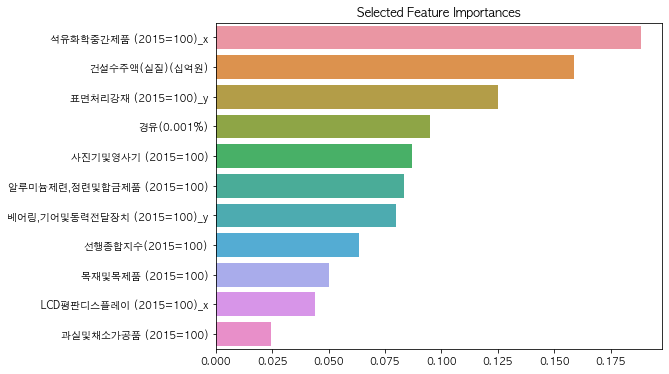

In [159]:
from sklearn.tree import DecisionTreeClassifier

# train, test split
X_train, X_test, y_train, y_test = train_test_split(df_top10.iloc[:,4:15], df_top10['label'], test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print(X_train.shape)
print(X_test.shape)

print(y_train.value_counts()/train_cnt)
print(y_test.value_counts()/test_cnt)

# CART 모델
model = DecisionTreeClassifier(max_depth=7, random_state=1)
model.fit(X_train, y_train)
# model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)
print('정확도 : ',accuracy_score(y_pred, y_test))

ftr_importances = pd.Series(model.feature_importances_, index = X_train.columns)

ftr_top5 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.rcParams['font.family'] = 'AppleGothic'
plt.title('Selected Feature Importances')
sns.barplot(x=ftr_top5, y=ftr_top5.index)
plt.show()

#### 하락 팩터 찾기

In [ ]:
## feature selection된 데이터 MinMaxScaling

# 데이터 불러오기 및 날짜 인덱스 지정
df_apr_f = pd.read_csv('data/9_에이피알 - features.csv')
df_apr_f.date = pd.to_datetime(df_apr_f.date)
df_apr_f = df_apr_f.ffill()
# df = df_apr_f.drop(['생산자제품재고지수','신선어개류 물가'], axis=1)
# df_onlyfeat = df_apr_f.drop(['emart_close', 'kospi_close', 'emartMinMax', 'kospiMinMax', 'k-p_diff', 'k_p10'], axis=1)
df_apr_f = df_apr_f.set_index('date')
df_apr_ff = df_apr_f.drop('소비자 거래지수', axis=1)

# MinMaxScaler로 price, kospi 데이터 정규화
scaler = MinMaxScaler()
scaler.fit(df_apr_ff)
scaled = scaler.transform(df_apr_ff)
df_scaled = pd.DataFrame(scaled, columns=['생산자제품재고지수(전월비)(%)','신선어개','트래픽','소비자 거래건수'])

# 정규화한 데이터에 날짜 열 추가
# df_onlyfeat = df_onlyfeat.reset_index()
df_scaled.insert(0,'date', df['date'] )

# 원본데이터에 merge
df_apr_f = df_apr_f.drop(df_apr_f.iloc[:,:4], axis=1)
df_apr_f = df_apr_f.reset_index()
df_apr_f = df_apr_f.merge(df_scaled, how='left')

df_apr_f = df.merge(df_apr_f, how='left')

df_apr_f.head()

## parameter 돌린 후

In [30]:
df.iloc[:,6:15]

,선행종합지수(2015=100),재고순환지표(%p),경제심리지수,기계류내수출하지수(선박제외)(2015=100),건설수주액(실질)(십억원),수출입물가비율(2015=100),코스피(1980.1.4=100),장단기금리차(%p),동행종합지수(2015=100)
0,0.031378,0.437050,0.712329,0.245478,0.222511,0.950000,0.010843,0.393651,0.000000
1,0.034106,0.437050,0.712329,0.245478,0.222511,0.950000,0.010843,0.393651,0.004237
2,0.038199,0.437050,0.712329,0.245478,0.222511,0.950000,0.010843,0.393651,0.009887
3,0.035471,0.437050,0.712329,0.245478,0.222511,0.950000,0.010843,0.393651,0.016949
4,0.035471,0.437050,0.712329,0.245478,0.222511,0.950000,0.010843,0.393651,0.024011
...,...,...,...,...,...,...,...,...,...
294,0.995907,0.188849,0.782779,0.529716,0.862189,0.030882,0.762839,0.657143,0.975989
295,0.998636,0.167266,0.729941,0.614987,1.000000,0.030882,0.720105,0.603175,0.987288
296,1.000000,0.154676,0.682975,0.687339,0.933958,0.032353,0.701431,0.533333,1.000000
297,1.000000,0.154676,0.682975,0.687339,0.933958,0.032353,0.701431,0.533333,1.000000


[17:55:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1662013895516/work/src/learner.cc:627: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


0.6333333333333333


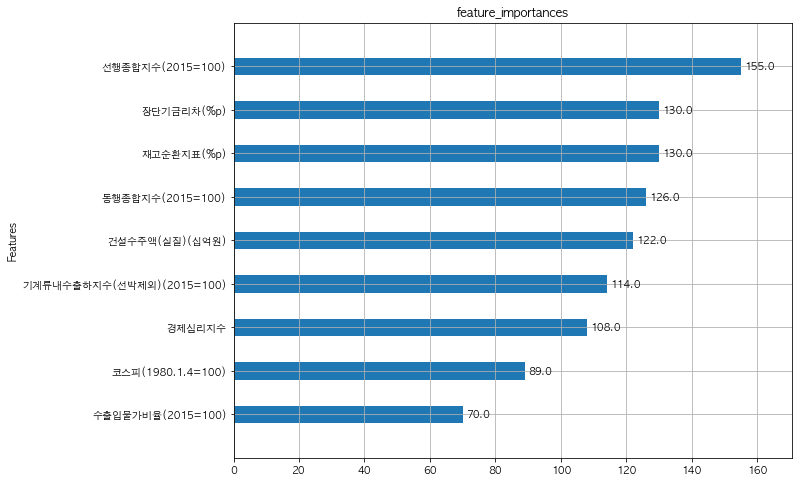

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,6:15], df['label'], test_size=0.2, random_state=42)

model = XGBClassifier(params = best_param)
model.fit(X_train, y_train)

best_param = {'colsample_bytree': 1.0, 'eta': 0.3, 'gamma': 0.7, 
              'learning_rate': 0.3, 'max_depth': 4, 'max_leaves': 10, 
              'min_child_weight': 5, 'n_estimators': 300, 'random_state': 99, 
              'reg_alpha': 0.1, 'subsample': 0.7, 'tree_method': 'hist',
             }

y_pred = model.predict(X_test)
print(accuracy_score(y_pred, y_test))

fig, ax = plt.subplots(1,1,figsize=(10,8))
plt.rcParams['font.family'] = 'AppleGothic'
xgboost.plot_importance(model, title='feature_importances', xlabel='', ax=ax, max_num_features=20, height=0.4)
# xgboost.plot_importance(xgb, title='feature_importances', xlabel='', grid=False, ax=ax)

plt.show()
